# Joining California's Mass Exodus

### Introduction

The Great Migration out of California, between 2008 and 2019, more than 18,000 companies have left Califrornia for more tax and regulatory friendly states.Major companies that have moved their headquiarters out of California in recent years are relocating mostly to Texas, followed by Nevada, Arizona, Colorado, Oregon, and Washington. For example, big companies like Tesla and Oracle are changing their corporate headquarters to Austin, Texas. In the near future, more companies will be a part of this migration due to anti-bussiness laws and regularions passed catching up. Other reasons why California became a less favorable place to live in is because of the high taxes (13% state income tax), high housing costs, cost of living in California is about 50 percent higher than the median. Additionally, with the flexibility from remote work rise in 2020, people are willing to leave the Golden State despite a pay cut.

With the consideration of moving out of California, it is important to first explore potential relocating neighborhood, comparing similarity and dissimilarity to the currently resided neighborhood. Downtown San Jose in San Jose, California. For the simplicity of this project, Austin, TX will be chosen for comparison. By applying methods and techniques learned from this data science course, we wish to find the most optimal relocation spot to continue the journey of chasing the American dream.

#### Target audience

This project targets to give first impression of Austin, Texas to people who are considering moving from Silicon valley.

### Data Description

Importing libraries to help us looking at the data. Code is directly imported from previous exercise with changes in installing geopy and folium.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


We first collect the geographical coordinates for San Jose,CA and Austin, TX.

In [2]:
addressFrom = 'San Jose, CA'
addressTo = 'Austin, TX'

geolocator = Nominatim(user_agent='my_email@myserver.com')
locationFrom = geolocator.geocode(addressFrom)
locationTo = geolocator.geocode(addressTo)
latitudeFrom = locationFrom.latitude
longitudeFrom = locationFrom.longitude
latitudeTo = locationTo.latitude
longitudeTo = locationTo.longitude
print(f'San Jose, CA coordinates are {latitudeFrom}, {longitudeFrom}')
print(f"Austin, TX's coordinates are {latitudeTo}, {longitudeTo}")

San Jose, CA coordinates are 37.3361905, -121.890583
Austin, TX's coordinates are 30.2711286, -97.7436995


Downtown San Jose's coordinate can be hardcoded

In [3]:
dt_sj_lat = 37.3337
dt_sj_lng = -121.8907

Neighborhood data for Austin, TX can be obtained from the Housing and Planning Department of the Austin City Government (https://jovian.ai/outlink?url=https%3A%2F%2Fdata.austintexas.gov%2FBuilding-and-Development%2FNeighborhoods%2Fa7ap-j2yt%3B)
This dataset is exported as csv format and included as asset in this project folder. includes 

In [4]:
# The code was removed by Watson Studio for sharing.

,the_geom,FID,TARGET_FID,NEIGHNAME,SqMiles,Shape_Leng,Shape__Area,Shape__Length
0,MULTIPOLYGON (((-97.792307359674 30.4567073495...,3,3,ANDERSON MILL,8.669086,154458.205390,2.416802e+08,154458.205390
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,95,95,WINDSOR PARK,2.383074,40527.378654,6.643628e+07,40527.378654
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,19,19,DAWSON,0.495535,17697.924998,1.381473e+07,17697.924998
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,91,91,WEST UNIVERSITY,0.738442,24981.044476,2.058658e+07,24981.044476
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,49,49,MLK,1.545283,33470.415430,4.308001e+07,33470.415430


In [5]:
df_Austin.shape

(103, 8)

Drop irrelavent data

In [6]:
df_Austin.drop(['FID', 'TARGET_FID', 'SqMiles','Shape_Leng', 'Shape__Area', 'Shape__Length'],axis=1, inplace=True)
df_Austin.head()

,the_geom,NEIGHNAME
0,MULTIPOLYGON (((-97.792307359674 30.4567073495...,ANDERSON MILL
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,WINDSOR PARK
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,DAWSON
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,WEST UNIVERSITY
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,MLK


This dataframe contains 103 neighborhood's data. The coordinate data is still missing from this dataset. The coordinate will be obtained from geopy.


In [7]:
df_Austin['LAT'] = None
df_Austin['LNG'] = None
df_Austin.head()

,the_geom,NEIGHNAME,LAT,LNG
0,MULTIPOLYGON (((-97.792307359674 30.4567073495...,ANDERSON MILL,None,None
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,WINDSOR PARK,None,None
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,DAWSON,None,None
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,WEST UNIVERSITY,None,None
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,MLK,None,None


In [8]:
austin_gmaps = Nominatim(user_agent='TX_explore')
for neighborhood in df_Austin['NEIGHNAME']:
    neighborhood_address = neighborhood + ' Austin, TX'
    try:
        location = austin_gmaps.geocode(neighborhood_address)
        df_Austin['LAT'].loc[df_Austin['NEIGHNAME'] == neighborhood] = location.latitude
        df_Austin['LNG'].loc[df_Austin['NEIGHNAME'] == neighborhood] = location.longitude
        #print(neighborhood, location.latitude, location.longitude)
    except:
        print(neighborhood + " has wrong name")

DITTMAR--SLAUGHTER has wrong name
MANSFIELD--RIVER PLACE has wrong name
RMMA has wrong name
HAYS WARTHA has wrong name
VILLAGE AT WESTERN OAKS has wrong name
DEL VALLE has wrong name
ROBINSON RANCH has wrong name
DEL VALLE EAST has wrong name
UPPER BOGGY CREEK has wrong name
WHISPER VALLEY has wrong name
NORTH LAMAR RUNDBERG has wrong name
AVERY RANCH--LAKELINE has wrong name
BARTON CREEK MALL has wrong name
NORTH UNIVERSITY has wrong name


Some neighborhoods' name are incorrect, they will be ignored.

In [9]:
df_Austin.dropna(inplace=True)

To further clean the dataframe, first column is removed

In [10]:
df_Austin.drop(['the_geom'],axis=1,inplace=True)
df_Austin

,NEIGHNAME,LAT,LNG
0,ANDERSON MILL,30.4558,-97.8071
1,WINDSOR PARK,30.3135,-97.6911
2,DAWSON,30.2329,-97.7614
3,WEST UNIVERSITY,30.2817,-97.7388
4,MLK,30.284,-97.694
5,SOUTH RIVER CITY,30.2494,-97.7456
6,MLK-183,30.2794,-97.6739
7,OLD WEST AUSTIN,30.2968,-97.7549
8,BOULDIN CREEK,30.2557,-97.7555
9,WALNUT CREEK--PIONEER HILL,30.3789,-97.6534


In [11]:
df_Austin.shape

(89, 3)

89 neighborhoods remaining. Let's visualize where all these neighborhood are located.

In [12]:
map_Austin = folium.Map(location=[latitudeTo, longitudeTo], zoom_start=11)

for lat, lng, label in zip(df_Austin['LAT'], df_Austin['LNG'], df_Austin['NEIGHNAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Austin)
    
map_Austin

After the geographical data are prepared, Foursquare API is used to explore venus within reasonable walking distance, 1km

In [13]:
# The code was removed by Watson Studio for sharing.

In [14]:
VERSION = '20180605'
LIMIT = 100

Let's explore Downtown San jose, getting the top 100 venues that are within a radius of 1km.

Creating GET request URL

In [15]:
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    dt_sj_lat, 
    dt_sj_lng, 
    radius, 
    LIMIT)

Look at the GET request results

In [16]:
dt_sj_results = requests.get(url).json()
dt_sj_results

{'meta': {'code': 200, 'requestId': '60122d7a65651635c780682b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown San Jose',
  'headerFullLocation': 'Downtown San Jose, San Jose',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 156,
  'suggestedBounds': {'ne': {'lat': 37.34270000900001,
    'lng': -121.87940203264628},
   'sw': {'lat': 37.32469999099999, 'lng': -121.90199796735371}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a6baaf9f964a5208dcf1fe3',
       'name': 'Silicon Valley Capital Club',
       'location': {'address': '50 W San Fernando St',
        'lat': 37.3337893,
        'lng': -121.8892131,
      

Extracting catgory of the venus

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean data and put into pandas dataframe

In [18]:
dt_sj_venues = dt_sj_results['response']['groups'][0]['items']
    
dt_sj_nearby_venues = json_normalize(dt_sj_venues) # flatten JSON

# filter columns
dt_sj_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
dt_sj_nearby_venues =dt_sj_nearby_venues.loc[:, dt_sj_filtered_columns]

# filter the category for each row
dt_sj_nearby_venues['venue.categories'] = dt_sj_nearby_venues.apply(get_category_type, axis=1)

# clean columns
dt_sj_nearby_venues.columns = [col.split(".")[-1] for col in dt_sj_nearby_venues.columns]

dt_sj_nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Silicon Valley Capital Club,Restaurant,37.333789,-121.889213
1,Morton's The Steakhouse,Steakhouse,37.333048,-121.888907
2,San Pedro Square,Plaza,37.335179,-121.893044
3,Original Gravity Public House,Pub,37.335052,-121.889747
4,Umbrella Salon,Salon / Barbershop,37.335629,-121.892059


Same will be done on the first neighborhood in Austin, Anderson Mill

In [19]:
anderson_mill_lat = df_Austin['LAT'].iloc[0]
anderson_mill_lng = df_Austin['LNG'].iloc[0]
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    anderson_mill_lat, 
    anderson_mill_lng, 
    radius, 
    LIMIT)

In [20]:
anderson_mill_results = requests.get(url).json()
anderson_mill_results

{'meta': {'code': 200, 'requestId': '60122d7bac754233f61bc520'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Village at Anderson Mill',
  'headerFullLocation': 'Village at Anderson Mill, Austin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 19,
  'suggestedBounds': {'ne': {'lat': 30.46483450900001,
    'lng': -97.79667459193007},
   'sw': {'lat': 30.446834490999994, 'lng': -97.81751680806994}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e9c6074f5b9d590054b6c83',
       'name': 'Millrun Park',
       'location': {'address': '12100 Millwright Pkwy.',
        'lat': 30.4515483714773,
        'lng': -97.80297466900612,
        'labeledLatLngs': [{'label': 

In [21]:
anderson_mill_venues = anderson_mill_results['response']['groups'][0]['items']
    
anderson_mill_nearby_venues = json_normalize(anderson_mill_venues) # flatten JSON

# filter columns
anderson_mill_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
anderson_mill_nearby_venues =anderson_mill_nearby_venues.loc[:, anderson_mill_filtered_columns]

# filter the category for each row
anderson_mill_nearby_venues['venue.categories'] = anderson_mill_nearby_venues.apply(get_category_type, axis=1)

# clean columns
anderson_mill_nearby_venues.columns = [col.split(".")[-1] for col in anderson_mill_nearby_venues.columns]

anderson_mill_nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Millrun Park,Park,30.451548,-97.802975
1,Harper Park (in Anderson Mill),Park,30.457869,-97.811024
2,Freda's Seafood Grille,Seafood Restaurant,30.464196,-97.803776
3,Interstellar Bbq,BBQ Joint,30.461178,-97.814930
4,Punch Austin Kettlebell Gym,Gym / Fitness Center,30.447413,-97.810296


This is an example of the data used in the analysis in the next section. Downtown San Jose's venue data will be listed out by top 10 venus. <br>
Other neighborhoods in Austin will perform the same action, clusting will be added to group similar neighborhood together. 

Checking how many unique categories there are

In [22]:
dt_sj_nearby_venues.groupby('categories').count()

,name,lat,lng
categories,,,
Art Gallery,5,5,5
Art Museum,1,1,1
BBQ Joint,1,1,1
Bakery,1,1,1
Bar,4,4,4
Beer Bar,1,1,1
Brazilian Restaurant,1,1,1
Burger Joint,1,1,1
Burrito Place,1,1,1


In [23]:
print(f"There are {len(dt_sj_nearby_venues['categories'].unique())} uniques categories")

There are 57 uniques categories


Analyzing DT sj

In [24]:
dt_sj_nearby_venues.head()

,name,categories,lat,lng
0,Silicon Valley Capital Club,Restaurant,37.333789,-121.889213
1,Morton's The Steakhouse,Steakhouse,37.333048,-121.888907
2,San Pedro Square,Plaza,37.335179,-121.893044
3,Original Gravity Public House,Pub,37.335052,-121.889747
4,Umbrella Salon,Salon / Barbershop,37.335629,-121.892059


In [25]:
dt_sj_onehot = pd.get_dummies(dt_sj_nearby_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_sj_onehot['Neighbourhood'] = 'Downtown San Jose'
fixed_columns = [dt_sj_onehot.columns[-1]] + list(dt_sj_onehot.columns[:-1])
dt_sj_onehot = dt_sj_onehot[fixed_columns]
dt_sj_onehot.head()

,Neighbourhood,Art Gallery,Art Museum,BBQ Joint,Bakery,Bar,Beer Bar,Brazilian Restaurant,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Climbing Gym,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Food Court,Food Truck,Frozen Yogurt Shop,Gastropub,German Restaurant,Greek Restaurant,Hockey Arena,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Juice Bar,Korean Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Museum,New American Restaurant,Opera House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pub,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Science Museum,Shipping Store,Steakhouse,Sushi Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Downtown San Jose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Downtown San Jose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Downtown San Jose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Downtown San Jose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Downtown San Jose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
dt_sj_onehot.shape

(100, 58)

In [27]:
dt_sj_grouped = dt_sj_onehot.groupby('Neighbourhood').mean().reset_index()
dt_sj_grouped

,Neighbourhood,Art Gallery,Art Museum,BBQ Joint,Bakery,Bar,Beer Bar,Brazilian Restaurant,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Climbing Gym,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Cuban Restaurant,Dessert Shop,Food Court,Food Truck,Frozen Yogurt Shop,Gastropub,German Restaurant,Greek Restaurant,Hockey Arena,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Juice Bar,Korean Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Museum,New American Restaurant,Opera House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pub,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Science Museum,Shipping Store,Steakhouse,Sushi Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Downtown San Jose,0.05,0.01,0.01,0.01,0.04,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.05,0.07,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.08,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.03,0.03,0.01,0.01,0.04,0.01,0.01,0.01,0.02,0.03,0.01,0.01,0.01,0.01


In [28]:
dt_sj_grouped.shape

(1, 58)

In [29]:
num_top_venues = 10
print("----"+'Downtown San Jose'+"----")
temp = dt_sj_grouped.T.reset_index()
temp.columns = ['venue','freq']
temp = temp.iloc[1:]
temp['freq'] = temp['freq'].astype(float)
temp = temp.round({'freq': 2})
print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
print('\n')

----Downtown San Jose----
                venue  freq
0  Mexican Restaurant  0.08
1         Coffee Shop  0.07
2         Art Gallery  0.05
3        Cocktail Bar  0.05
4                 Bar  0.04
5      Sandwich Place  0.04
6             Theater  0.03
7                 Pub  0.03
8          Restaurant  0.03
9               Hotel  0.03




Summary for Downtown San Jose venue: <br>
It contains a mixture of dining places entertainment places. With most mexican restaurants and coffee shops.

Doing the same for Austin, TX

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
austin_venues = getNearbyVenues(names=df_Austin['NEIGHNAME'],
                                 latitudes=df_Austin['LAT'],
                                 longitudes=df_Austin['LNG'])

ANDERSON MILL
WINDSOR PARK
DAWSON
WEST UNIVERSITY
MLK
SOUTH RIVER CITY
MLK-183
OLD WEST AUSTIN
BOULDIN CREEK
WALNUT CREEK--PIONEER HILL
SOUTHEAST
UNIVERSITY HILLS
WINDSOR ROAD
JESTER
CIRCLE C SOUTH
WESTGATE
GALINDO
BRODIE LANE
HYDE PARK
MCKINNEY
WESTOVER HILLS
GRACY WOODS
PLEASANT VALLEY
SOUTH LAMAR
PECAN SPRINGS-SPRINGDALE
FOUR POINTS
POND SPRINGS
ST. EDWARDS
UT
HIGHLAND
DOWNTOWN
HANCOCK
TECH RIDGE
SAMSUNG--PIONEER CROSSING
WEST AUSTIN NG
BLUFF SPRINGS
MONTOPOLIS
CHERRY CREEK
BARTON HILLS
GATEWAY
WOOTEN
HOLLY
GARRISON PARK
GEORGIAN ACRES
EAST CESAR CHAVEZ
NORTH LOOP
MCNEIL
DAVENPORT LAKE AUSTIN
ZILKER
LBJ
WEST CONGRESS
BULL CREEK
HERITAGE HILLS
OLD ENFIELD
CHESTNUT
ROSEDALE
NORTH BURNET
BERGSTROM
SOUTH BRODIE
DECKER LAKE
GOVALLE
NORTH SHOAL CREEK
RIVERSIDE
WEST OAK HILL
CORONADO HILLS
ONION CREEK
HIGHLAND PARK
ROSEWOOD
PARKER LANE
ALLANDALE
EAST CONGRESS
CRESTVIEW
CENTRAL EAST AUSTIN
HARRIS BRANCH
TRIANGLE STATE
ST. JOHNS
JOHNSTON TERRACE
NORTHWEST HILLS
JOLLYVILLE
SLAUGHTER CREEK
SOU

Check the size of the df

In [32]:
print(austin_venues.shape)
austin_venues.head()

(1198, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ANDERSON MILL,30.455835,-97.807096,Harper Park (in Anderson Mill),30.457869,-97.811024,Park
1,ANDERSON MILL,30.455835,-97.807096,Taqueria Benitez,30.455814,-97.804982,Food Truck
2,ANDERSON MILL,30.455835,-97.807096,Pecan Park Trail,30.457893,-97.811078,Dog Run
3,ANDERSON MILL,30.455835,-97.807096,North Park Trail,30.458847,-97.804016,Park
4,ANDERSON MILL,30.455835,-97.807096,Anderson Mill Pool,30.457459,-97.802449,Pool


Check how many venues were returned for each neighborhood

In [33]:
austin_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
ANDERSON MILL,5,5,5,5,5,5
BARTON HILLS,2,2,2,2,2,2
BERGSTROM,1,1,1,1,1,1
BLUFF SPRINGS,4,4,4,4,4,4
BOULDIN CREEK,16,16,16,16,16,16
BRENTWOOD,25,25,25,25,25,25
BRODIE LANE,20,20,20,20,20,20
BULL CREEK,3,3,3,3,3,3
CENTRAL EAST AUSTIN,28,28,28,28,28,28


Many neighborhoods contain less than 10 venues, will drop these neighborhoods.

In [34]:
austin_venues_filtered = austin_venues.groupby('Neighbourhood').filter(lambda x: len(x)>= 10)

In [35]:
austin_venues_filtered.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
BOULDIN CREEK,16,16,16,16,16,16
BRENTWOOD,25,25,25,25,25,25
BRODIE LANE,20,20,20,20,20,20
CENTRAL EAST AUSTIN,28,28,28,28,28,28
CHESTNUT,12,12,12,12,12,12
CIRCLE C SOUTH,57,57,57,57,57,57
DAWSON,12,12,12,12,12,12
DOWNTOWN,100,100,100,100,100,100
EAST CESAR CHAVEZ,21,21,21,21,21,21


In [36]:
austin_venues_filtered.groupby('Neighbourhood').size()

Neighbourhood
BOULDIN CREEK           16
BRENTWOOD               25
BRODIE LANE             20
CENTRAL EAST AUSTIN     28
CHESTNUT                12
CIRCLE C SOUTH          57
DAWSON                  12
DOWNTOWN               100
EAST CESAR CHAVEZ       21
FOUR POINTS             22
GATEWAY                 13
GOVALLE                 21
GRACY WOODS             12
HIGHLAND                16
HIGHLAND PARK           45
HOLLY                   49
HYDE PARK               19
JOLLYVILLE              12
MCNEIL                  25
NORTH BURNET            12
NORTH LOOP              27
PARKER LANE             11
PLEASANT VALLEY         13
POND SPRINGS            26
RIVERSIDE               45
ROSEDALE                14
SOUTH BRODIE            29
SOUTH RIVER CITY        40
SPICEWOOD               31
TRIANGLE STATE          24
UT                      22
WEST AUSTIN NG          90
WEST CONGRESS           13
WEST UNIVERSITY         57
WESTGATE                23
WINDSOR PARK            13
WINDSOR ROAD  

Analyzing each neighborhood in Austin, TX

In [37]:
austin_onehot = pd.get_dummies(austin_venues_filtered[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Neighbourhood'] = austin_venues_filtered['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [austin_onehot.columns[-1]] + list(austin_onehot.columns[:-1])
austin_onehot = austin_onehot[fixed_columns]

austin_onehot.head()

,Neighbourhood,Adult Boutique,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Stadium,Bed & Breakfast,Beer Garden,Big Box Store,Bike Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Candy Store,Capitol Building,Cheese Shop,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Quad,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Farm,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Lawyer,Lighthouse,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Office,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Service,Restaurant,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
5,WINDSOR PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,WINDSOR PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,WINDSOR PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,WINDSOR PAR

In [38]:
austin_onehot.shape

(1025, 200)

In [39]:
austin_grouped = austin_onehot.groupby('Neighbourhood').mean().reset_index()

In [40]:
austin_grouped.head()

,Neighbourhood,Adult Boutique,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Stadium,Bed & Breakfast,Beer Garden,Big Box Store,Bike Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Candy Store,Capitol Building,Cheese Shop,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Quad,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Farm,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Lawyer,Lighthouse,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Office,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Service,Restaurant,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,BOULDIN CREEK,0.0,0.0625,0.000000,0.0,0.000000,0.0,0.0625,0.00,0.0,0.0,0.0625,0.000000,0.000000,0.00,0.0625,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0625,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0625,0.0,0.0,0.0,0.125000,0.0,0.00,0.00,0.00,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0625,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
1,BRENTWOOD,0.0,0.0000,0.040000,0.0,0.000000,0.0,0.0000,0.04,0.0,0.0,0.0000,0.000000,0.000000,0.04,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.0,0.00000

In [41]:
austin_grouped.shape

(37, 200)

Printing each neighbourhood along with the top 10 most common venues

In [42]:
num_top_venues = 10

for hood in austin_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = austin_grouped[austin_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BOULDIN CREEK----
                     venue  freq
0       Mexican Restaurant  0.12
1                     Park  0.12
2           Ice Cream Shop  0.06
3       Basketball Stadium  0.06
4       African Restaurant  0.06
5  New American Restaurant  0.06
6               Food Truck  0.06
7                     Pool  0.06
8                 Creperie  0.06
9          Thai Restaurant  0.06


----BRENTWOOD----
                    venue  freq
0            Burger Joint  0.08
1             Coffee Shop  0.08
2          Ice Cream Shop  0.04
3               Pet Store  0.04
4          Hardware Store  0.04
5              Taco Place  0.04
6               Gift Shop  0.04
7     Fried Chicken Joint  0.04
8                Pharmacy  0.04
9  Thrift / Vintage Store  0.04


----BRODIE LANE----
                    venue  freq
0    Fast Food Restaurant  0.10
1          Ice Cream Shop  0.05
2                    Bank  0.05
3       Convenience Store  0.05
4            Burger Joint  0.05
5          Cosmetics Shop  0.

Put data into pandas dataframe

Create functing to sort venues in descending order

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
austin_venues_sorted = pd.DataFrame(columns=columns)
austin_venues_sorted['Neighbourhood'] = austin_grouped['Neighbourhood']

for ind in np.arange(austin_grouped.shape[0]):
    austin_venues_sorted.iloc[ind, 1:] = return_most_common_venues(austin_grouped.iloc[ind, :], num_top_venues)

austin_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BOULDIN CREEK,Mexican Restaurant,Park,Ice Cream Shop,BBQ Joint,Japanese Restaurant,Food Truck,New American Restaurant,Pool,Basketball Stadium,Thai Restaurant
1,BRENTWOOD,Coffee Shop,Burger Joint,Ice Cream Shop,Bar,Pet Store,Cosmetics Shop,Dive Bar,Sandwich Place,Mobile Phone Shop,Shoe Store
2,BRODIE LANE,Fast Food Restaurant,Ice Cream Shop,Thai Restaurant,Greek Restaurant,Fried Chicken Joint,Mexican Restaurant,Pharmacy,Cosmetics Shop,Coffee Shop,Sandwich Place
3,CENTRAL EAST AUSTIN,Food Truck,Yoga Studio,Boutique,Café,Liquor Store,Movie Theater,Music Store,Park,Gift Shop,Cosmetics Shop
4,CHESTNUT,Coffee Shop,Southern / Soul Food Restaurant,Taco Place,Theater,Market,Park,Convenience Store,Restaurant,Café,Art Gallery


Clustering Neighborhoods

In [45]:
# set number of clusters
kclusters = 6

austin_grouped_clustering = austin_grouped.drop('Neighbourhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(austin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 1, 4, 5, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 4, 4, 2,
       1, 1, 4, 5, 1, 4, 1, 1, 4, 4, 3, 4, 1, 1, 0], dtype=int32)

Creating new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [46]:
# add clustering labels
austin_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

austin_merged = df_Austin

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
austin_merged = austin_merged.join(austin_venues_sorted.set_index('Neighbourhood'), on='NEIGHNAME')
austin_merged.dropna(inplace=True)
austin_merged.head(10) # check the last columns!

,NEIGHNAME,LAT,LNG,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,WINDSOR PARK,30.3135,-97.6911,1.0,Cosmetics Shop,Pizza Place,Recording Studio,Veterinarian,Taco Place,Pharmacy,Gym / Fitness Center,Discount Store,Food Truck,Restaurant
2,DAWSON,30.2329,-97.7614,1.0,Furniture / Home Store,Cosmetics Shop,Coffee Shop,Taco Place,Bar,Garden Center,Convenience Store,Pizza Place,Athletics & Sports,Hawaiian Restaurant
3,WEST UNIVERSITY,30.2817,-97.7388,4.0,Fast Food Restaurant,Coffee Shop,Pizza Place,Pool,Bubble Tea Shop,Indian Restaurant,Art Museum,Public Art,Sushi Restaurant,Japanese Restaurant
5,SOUTH RIVER CITY,30.2494,-97.7456,4.0,Coffee Shop,Shoe Store,Food Truck,Sandwich Place,Music Venue,Hotel,Vegetarian / Vegan Restaurant,Pizza Place,Souvenir Shop,Clothing Store
8,BOULDIN CREEK,30.2557,-97.7555,4.0,Mexican Restaurant,Park,Ice Cream Shop,BBQ Joint,Japanese Restaurant,Food Truck,New American Restaurant,Pool,Basketball Stadium,Thai Restaurant
12,WINDSOR ROAD,30.2818,-97.7539,0.0,Italian Restaurant,Pet Store,Snack Place,Soccer Stadium,Grocery Store,Park,Lighthouse,Plaza,Food Truck,Historic Site
14,CIRCLE C SOUTH,30.2498,-97.7483,4.0,Hotel,Coffee Shop,Italian Restaurant,Ice Cream Shop,Food Truck,Shoe Store,Sandwich Place,Boutique,Gym / Fitness Center,Pizza Place
15,WESTGATE,30.228,-97.8009,1.0,Salon / Barbershop,Cosmetics Shop,Yoga Studio,Furniture / Home Store,Shoe Store,Movie Theater,Mobile Phone Shop,Juice Bar,Hookah Bar,Gas Station
17,BRODIE LANE,30.1845,-97.8493,4.0,Fast Food Restaurant,Ice Cream Shop,Thai Restaurant,Greek Restaurant,Fried Chicken Joint,Mexican Restaurant,Pharmacy,Cosmetics Shop,Coffee Shop,Sandwich Place
18,HYDE PARK,30.3044,-97.7304,1.0,Bus Station,Cheese Shop,Italian Restaurant,Pool,Park,Lighthouse,Tailor Shop,Salon / Barbershop,Grocery Store,Bakery


Change cluster labels into int

In [47]:
austin_merged['Cluster Labels'] = austin_merged['Cluster Labels'].astype(int)

### Result

Visualize the result

In [48]:
# create map
map_clusters = folium.Map(location=[latitudeTo, longitudeTo], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(austin_merged['LAT'], austin_merged['LNG'], austin_merged['NEIGHNAME'], austin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examinging each cluster

#### Cluster 1

In [49]:
austin_merged.loc[austin_merged['Cluster Labels'] == 0, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

,NEIGHNAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,WINDSOR ROAD,Italian Restaurant,Pet Store,Snack Place,Soccer Stadium,Grocery Store,Park,Lighthouse,Plaza,Food Truck,Historic Site


#### Cluster 2

In [50]:
austin_merged.loc[austin_merged['Cluster Labels'] == 1, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

,NEIGHNAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,WINDSOR PARK,Cosmetics Shop,Pizza Place,Recording Studio,Veterinarian,Taco Place,Pharmacy,Gym / Fitness Center,Discount Store,Food Truck,Restaurant
2,DAWSON,Furniture / Home Store,Cosmetics Shop,Coffee Shop,Taco Place,Bar,Garden Center,Convenience Store,Pizza Place,Athletics & Sports,Hawaiian Restaurant
15,WESTGATE,Salon / Barbershop,Cosmetics Shop,Yoga Studio,Furniture / Home Store,Shoe Store,Movie Theater,Mobile Phone Shop,Juice Bar,Hookah Bar,Gas Station
18,HYDE PARK,Bus Station,Cheese Shop,Italian Restaurant,Pool,Park,Lighthouse,Tailor Shop,Salon / Barbershop,Grocery Store,Bakery
21,GRACY WOODS,Gym,Mexican Restaurant,Donut Shop,Food Truck,Liquor Store,Coffee Shop,Karaoke Bar,College Bookstore,Shipping Store,Pizza Place
22,PLEASANT VALLEY,Convenience Store,Bus Station,Pool Hall,Music Venue,Sandwich Place,Pharmacy,Gym / Fitness Center,Pizza Place,Video Store,Health & Beauty Service
25,FOUR POINTS,Coffee Shop,Sandwich Place,Pharmacy,Video Store,Bank,Taco Place,Salon / Barbershop,Big Box Store,Liquor Store,Shipping Store
26,POND SPRINGS,Health & Beauty Service,Mattress Store,Frozen Yogurt Shop,Fried Chicken Joint,Sushi Restaurant,Supplement Shop,Playground,Market,Martial Arts School,Food Truck
29,HIGHLAND,Clothing Store,Hookah Bar,Automotive Shop,Mobile Phone Shop,Chinese Restaurant,Gas Station,Brewery,Gift Shop,Shoe Store,Bank
40,GATEWAY,Warehouse Store,Hotel,Arts & Crafts Store,Furniture / Home Store,Supplement Shop,Food Court,Grocery Store,Bakery,Optical Shop,Pizza Place


#### Cluster 3

In [51]:
austin_merged.loc[austin_merged['Cluster Labels'] == 2, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

,NEIGHNAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,PARKER LANE,Hotel,Gym,Food Truck,Coffee Shop,Scenic Lookout,Harbor / Marina,Park,Pool,American Restaurant,Food Court


#### Cluster 4

In [52]:
austin_merged.loc[austin_merged['Cluster Labels'] == 3, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

,NEIGHNAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,WEST CONGRESS,Mexican Restaurant,Taco Place,Convenience Store,Music Venue,Art Gallery,Restaurant,Pet Store,Park,Office,Music Store


#### Cluster 5

In [53]:
austin_merged.loc[austin_merged['Cluster Labels'] == 4, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

,NEIGHNAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,WEST UNIVERSITY,Fast Food Restaurant,Coffee Shop,Pizza Place,Pool,Bubble Tea Shop,Indian Restaurant,Art Museum,Public Art,Sushi Restaurant,Japanese Restaurant
5,SOUTH RIVER CITY,Coffee Shop,Shoe Store,Food Truck,Sandwich Place,Music Venue,Hotel,Vegetarian / Vegan Restaurant,Pizza Place,Souvenir Shop,Clothing Store
8,BOULDIN CREEK,Mexican Restaurant,Park,Ice Cream Shop,BBQ Joint,Japanese Restaurant,Food Truck,New American Restaurant,Pool,Basketball Stadium,Thai Restaurant
14,CIRCLE C SOUTH,Hotel,Coffee Shop,Italian Restaurant,Ice Cream Shop,Food Truck,Shoe Store,Sandwich Place,Boutique,Gym / Fitness Center,Pizza Place
17,BRODIE LANE,Fast Food Restaurant,Ice Cream Shop,Thai Restaurant,Greek Restaurant,Fried Chicken Joint,Mexican Restaurant,Pharmacy,Cosmetics Shop,Coffee Shop,Sandwich Place
28,UT,Coffee Shop,History Museum,Pool,Fast Food Restaurant,Performing Arts Venue,College Gym,Taco Place,Gift Shop,Football Stadium,Theater
30,DOWNTOWN,Hotel,Bar,Cocktail Bar,Coffee Shop,New American Restaurant,Italian Restaurant,Speakeasy,Lounge,Gay Bar,Grocery Store
35,WEST AUSTIN NG,Coffee Shop,Bar,New American Restaurant,Cocktail Bar,Hotel,Italian Restaurant,Restaurant,Mexican Restaurant,Sushi Restaurant,Taco Place
47,NORTH LOOP,Pizza Place,Convenience Store,Cocktail Bar,Thrift / Vintage Store,Bar,Dive Bar,Deli / Bodega,Park,Music Store,Coffee Shop
48,MCNEIL,Fast Food Restaurant,Mexican Restaurant,Bank,Convenience Store,Thai Restaurant,Restaurant,Coffee Shop,Sandwich Place,Shipping Store,Spa


#### Cluster 6

In [54]:
austin_merged.loc[austin_merged['Cluster Labels'] == 5, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

,NEIGHNAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,ROSEDALE,Food Truck,Mexican Restaurant,Taco Place,Coffee Shop,Bus Station,Gym,Bakery,Park,Athletics & Sports,Convenience Store
84,CENTRAL EAST AUSTIN,Food Truck,Yoga Studio,Boutique,Café,Liquor Store,Movie Theater,Music Store,Park,Gift Shop,Cosmetics Shop


In [55]:
austin_grouped.head()

,Neighbourhood,Adult Boutique,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Stadium,Bed & Breakfast,Beer Garden,Big Box Store,Bike Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Candy Store,Capitol Building,Cheese Shop,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Quad,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Farm,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Lawyer,Lighthouse,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Office,Optical Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Service,Restaurant,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,BOULDIN CREEK,0.0,0.0625,0.000000,0.0,0.000000,0.0,0.0625,0.00,0.0,0.0,0.0625,0.000000,0.000000,0.00,0.0625,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0625,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0625,0.0,0.0,0.0,0.125000,0.0,0.00,0.00,0.00,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0625,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
1,BRENTWOOD,0.0,0.0000,0.040000,0.0,0.000000,0.0,0.0000,0.04,0.0,0.0,0.0000,0.000000,0.000000,0.04,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.0,0.00000

Let's take a step back to find out which K is the best

In [56]:
mms = MinMaxScaler()
mms.fit(austin_grouped.drop(columns=['Neighbourhood']))
austin_data_transformed = mms.transform(austin_grouped.drop(columns=['Neighbourhood']))

In [57]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(austin_data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

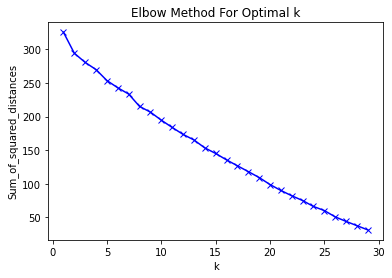

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Interestingly, there is not an optimal k value given the dataset. <br>
Reason could be using 100 venues per neighborhood is not a sufficient criteria for clustering. <br>
Additional data such as house price, crime rate, traffic data may be needed in order to make this clustering more meaningful.

Recall Downtown San Jose's venue

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
dt_sj_venues_sorted = pd.DataFrame(columns=columns)
dt_sj_venues_sorted['Neighbourhood'] = dt_sj_grouped['Neighbourhood']

for ind in np.arange(dt_sj_grouped.shape[0]):
    dt_sj_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_sj_grouped.iloc[ind, :], num_top_venues)

dt_sj_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown San Jose,Mexican Restaurant,Coffee Shop,Art Gallery,Cocktail Bar,Bar,Sandwich Place,Hotel,Theater,Restaurant,Pub


### Discussion

Summary of the 6 cluster from the result section:
1. The first cluster consists of restaurants, grocery stores, and outdoor park/ facilities.
2. The second cluster consists of utility stores such as comsmetic, salon, and mattress stores, and restaurants.
3. The third cluster consists of hotel, sports facilities such as gym, park, and pool.
4. The fourth cluster consists of restaurants, and stores.
5. The fifth clusters consists of restaurants, coffee shops, bars, hotels, and grocery stores.
6. The sixth clusters consists of restuarants, shops, and park.

Neighborhood in cluster 1, 3, 4, 6 have significantly less neighbordhood than cluster 2 and 5. <br>
As an initial assessment into neighborhoods in Austin, TX is sufficient to gain general insight of where things are in town.

The current living environment (Downtown San Jose, CA) is largely composed of restaurants, coffee shop, bars, and entertainment facilities. <br>
If one wants to change their life style minimally, neighborhoods in cluster 5 should be first looked into. For example, Govalle neighborhood in Austin, TX.

### Conclusion

Moving from a familar place to a completely strange place can be fearsome. <br>
With the help of data science and Foursquare API data, one can visualize the differences in lifestyle, hence prepared with expectations. <br>
However, one should dive deeper and consider other factors, such as housing price, crime rate, and traffic conditions, contributing to the ideal living environment in Austin, TX.